In [14]:
import pandas as pd
import numpy as np
import re

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import joblib

# Rutas a los archivos guardados
model_path =  '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Random_Forest/rf_classifier.joblib'
vectorizer_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Random_Forest/tfidf_vectorizer.joblib'

# Cargar modelo y vectorizador
stack_model = joblib.load(model_path)
tfidf_vectorizer = joblib.load(vectorizer_path)

In [17]:
from google.colab import files
uploaded = files.upload()

Saving MEDIQA-CORR-2024-MS-ValidationSet-1-Full.csv to MEDIQA-CORR-2024-MS-ValidationSet-1-Full (1).csv


In [18]:
df = pd.read_csv('MEDIQA-CORR-2024-MS-ValidationSet-1-Full.csv', delimiter=',', encoding='utf-8')
# df= df.drop(['Error Sentence ID', 'Error Sentence', 'Corrected Sentence', 'Corrected Text'], axis=1)
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag,Error Sentence ID,Error Sentence,Corrected Sentence,Corrected Text
0,0,ms-val-0,A 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,1,5,Culture tests indicate Neisseria gonorrhoeae.,Culture tests indicate Trichomonas vaginalis.,A 24-year-old woman comes to the emergency dep...
1,1,ms-val-1,A 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,0,-1,NaN,NaN,NaN
2,2,ms-val-2,A 43-year-old woman comes to the physician bec...,0 A 43-year-old woman comes to the physician b...,1,24,Pathology confirms Streptococcus pneumoniae is...,Pathology confirms Mycoplasma pneumoniae is th...,A 43-year-old woman comes to the physician bec...
3,3,ms-val-3,A 4-year-old is brought into the emeregency ro...,0 A 4-year-old is brought into the emeregency ...,1,4,Laboratory studies confirm that he has a respi...,Laboratory studies confirm that he has parainf...,A 4-year-old is brought into the emeregency ro...
4,4,ms-val-4,A previously healthy 25-year-old man comes to ...,0 A previously healthy 25-year-old man comes t...,1,0,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...


In [19]:
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [20]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "â€\x9d": " ",
    ".â€\x9d": ".",
    "â€“": "-",
    "â€œsomething": "something",
    "patientâ€™s": "patients",
    "â‰¥": "≥",
    "\n": ",",
    "â€œ": "",
    "Waldenstromâ€™s": "Waldenströms",
    "Âµmol/L": "µmol/L",
    "â€œmemory": "memory",
    "weeksâ€™": "weeks",
    "74 Î¼m3": "74 μm^3",
    "ÂµIU/L": "µIU/L",
    "â‰¤": "≤",
    "Clâˆ’": "Cl-",
    "physicianâ€™s": "physicians",
    "ÂºF": "ºF",
    "âˆ’": "-",
    "Â½": "½",
    "Î¼g/dL": "μg/dL",
    "pediatricianâ€™s": "pediatricians",
    "yearsâ€™": "years",
    "Âµg": "µg",
    "â€": "",
    "Kennedyâ€™s": "Kennedys",
    "Kennedy™s": "Kennedys",
    "can™t": "can't",
    "Î²": "β",
    "Ã—": "x",
    "ÃŸ-hCG": "β-hCG",
    "SÃ©quard": "Séquard",
    "Î³": "γ",
    "Î¼m3": "μm^3",
    "Î±": "α",
    "Î¼U/mL": "μU/mL",
    "Î¼": "μ",
    "'": "",
    "\"":"" #Este lo dejo a consideracion, dependiendo si les funciona o no
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    df['Text'] = df['Text'].str.replace(old, new, regex=False)

# Verificar el reemplazo
df['Text'].head()


0    A 24-year-old woman comes to the emergency dep...
1    A 24-year-old woman comes to the emergency dep...
2    A 43-year-old woman comes to the physician bec...
3    A 4-year-old is brought into the emeregency ro...
4    A previously healthy 25-year-old man comes to ...
Name: Text, dtype: object

In [21]:
import pandas as pd
import re

# Función para aplicar todas las transformaciones no regex en una sola pasada
def optimize_text(text):
    # Aplicar transformaciones no regex
    text = text.strip().replace("Cl- ", "Cl ").replace("'", "").replace("’", "")
    text = text.replace(":,", ":").replace(',_', ',').replace('[', '').replace(']', '')
    text = text.replace(';', ',').replace('.,', '.').replace('mg dl', 'mg/dl')
    text = text.replace('é', 'e').replace('patient s', 'patients').replace('girl s', 'girls')
    text = text.replace('gilbert s', 'gilberts').replace(".'", ".").replace(",'", ",")
    text = text.replace("',", ",").lower()  # Convertir a minúsculas aquí para optimizar
    return text

# Aplicar optimizaciones no regex
df['Text'] = df['Text'].apply(optimize_text)

# Aplicar optimizaciones con regex
df['Text'] = df['Text'].str.replace(r',,', ',', regex=True)
df['Text'] = df['Text'].str.replace(r'  +', ' ', regex=True)
df['Text'] = df['Text'].str.replace('mm hg', 'mmHg', flags=re.IGNORECASE, regex=True)


In [22]:
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag,Error Sentence ID,Error Sentence,Corrected Sentence,Corrected Text
0,0,ms-val-0,a 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,1,5,Culture tests indicate Neisseria gonorrhoeae.,Culture tests indicate Trichomonas vaginalis.,A 24-year-old woman comes to the emergency dep...
1,1,ms-val-1,a 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,0,-1,NaN,NaN,NaN
2,2,ms-val-2,a 43-year-old woman comes to the physician bec...,0 A 43-year-old woman comes to the physician b...,1,24,Pathology confirms Streptococcus pneumoniae is...,Pathology confirms Mycoplasma pneumoniae is th...,A 43-year-old woman comes to the physician bec...
3,3,ms-val-3,a 4-year-old is brought into the emeregency ro...,0 A 4-year-old is brought into the emeregency ...,1,4,Laboratory studies confirm that he has a respi...,Laboratory studies confirm that he has parainf...,A 4-year-old is brought into the emeregency ro...
4,4,ms-val-4,a previously healthy 25-year-old man comes to ...,0 A previously healthy 25-year-old man comes t...,1,0,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...


**Modelo 1**

In [23]:
texts = df['Text'].values
labels = df['Error Flag'].values

X_new = tfidf_vectorizer.transform(texts)

new_predictions = stack_model.predict(X_new)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular y mostrar métricas de evaluación
accuracy = accuracy_score(labels, new_predictions)
precision = precision_score(labels, new_predictions, average='weighted')
recall = recall_score(labels, new_predictions, average='weighted')
f1 = f1_score(labels, new_predictions, average='weighted')

print(f"Accuracy on new data: {accuracy}")
print(f"Precision on new data: {precision}")
print(f"Recall on new data: {recall}")
print(f"F1 Score on new data: {f1}")


Accuracy on new data: 0.5557491289198606
Precision on new data: 0.3088570942951838
Recall on new data: 0.5557491289198606
F1 Score on new data: 0.3970525691499116


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


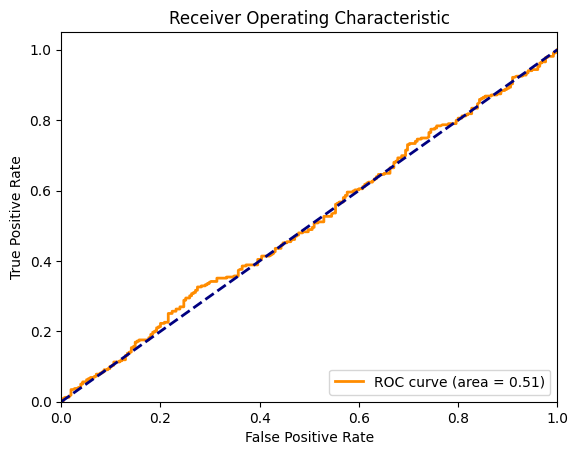

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegurándose de que stack_model soporte predict_proba
if hasattr(stack_model, "predict_proba"):
    # Obtener probabilidades para la clase positiva
    probas_ = stack_model.predict_proba(X_new)[:, 1]

    # Calcular la curva ROC y AUC
    fpr, tpr, thresholds = roc_curve(labels, probas_)
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("El modelo no soporta la estimación de probabilidades con predict_proba.")


In [25]:
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag,Error Sentence ID,Error Sentence,Corrected Sentence,Corrected Text
0,0,ms-val-0,a 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,1,5,Culture tests indicate Neisseria gonorrhoeae.,Culture tests indicate Trichomonas vaginalis.,A 24-year-old woman comes to the emergency dep...
1,1,ms-val-1,a 24-year-old woman comes to the emergency dep...,0 A 24-year-old woman comes to the emergency d...,0,-1,NaN,NaN,NaN
2,2,ms-val-2,a 43-year-old woman comes to the physician bec...,0 A 43-year-old woman comes to the physician b...,1,24,Pathology confirms Streptococcus pneumoniae is...,Pathology confirms Mycoplasma pneumoniae is th...,A 43-year-old woman comes to the physician bec...
3,3,ms-val-3,a 4-year-old is brought into the emeregency ro...,0 A 4-year-old is brought into the emeregency ...,1,4,Laboratory studies confirm that he has a respi...,Laboratory studies confirm that he has parainf...,A 4-year-old is brought into the emeregency ro...
4,4,ms-val-4,a previously healthy 25-year-old man comes to ...,0 A previously healthy 25-year-old man comes t...,1,0,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...,A previously healthy 25-year-old man comes to ...


In [26]:
df= df.drop(['Error Flag'], axis=1)

# Añadir las predicciones al DataFrame
df['Error Flag Pred'] = new_predictions

# Renombrar la columna 'Error Flag Pred' a 'Error Flag'
df.rename(columns={'Error Flag Pred': 'Error Flag'}, inplace=True)

# Seleccionar y conservar únicamente las columnas deseadas
df_final = df[['Text ID', 'Error Flag', 'Error Sentence ID', 'Corrected Sentence']]

# Mostrar las primeras filas del DataFrame final para verificar
print(df_final.head())


    Text ID  Error Flag  Error Sentence ID  \
0  ms-val-0           1                  5   
1  ms-val-1           1                 -1   
2  ms-val-2           1                 24   
3  ms-val-3           1                  4   
4  ms-val-4           1                  0   

                                  Corrected Sentence  
0      Culture tests indicate Trichomonas vaginalis.  
1                                                NaN  
2  Pathology confirms Mycoplasma pneumoniae is th...  
3  Laboratory studies confirm that he has parainf...  
4  A previously healthy 25-year-old man comes to ...  


In [27]:
df_final.head()

,Text ID,Error Flag,Error Sentence ID,Corrected Sentence
0,ms-val-0,1,5,Culture tests indicate Trichomonas vaginalis.
1,ms-val-1,1,-1,NaN
2,ms-val-2,1,24,Pathology confirms Mycoplasma pneumoniae is th...
3,ms-val-3,1,4,Laboratory studies confirm that he has parainf...
4,ms-val-4,1,0,A previously healthy 25-year-old man comes to ...


In [31]:
df_final['formatted'] = df_final.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Asegurar un solo espacio entre palabras, incluso si hay múltiples espacios originalmente
df_final['formatted'] = df_final['formatted'].apply(lambda x: ' '.join(x.split()))

# Guardar el DataFrame modificado a un archivo de texto sin comillas y con un solo espacio
with open('prediction_random.txt', 'w', encoding='utf-8') as file:
    for item in df_final['formatted']:
        file.write("%s\n" % item)

# Importar la función de descarga de archivos de Colab
from google.colab import files

# Descargar el archivo de texto a tu computadora
files.download('prediction_random.txt')

<ipython-input-31-8a2d51a652af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['formatted'] = df_final.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
<ipython-input-31-8a2d51a652af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['formatted'] = df_final['formatted'].apply(lambda x: ' '.join(x.split()))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>